In [1]:
#import dependencies
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import fashion_mnist,cifar10
from keras import regularizers
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
#load data
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
#normalise
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [4]:
#to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [5]:
#architecture
model_base=Sequential()
model_base.add(Flatten(input_shape=(32,32,3))) #first layer
model_base.add(Dense(1024,activation='relu'))#hidden layer
model_base.add(Dense(512,activation='relu'))
model_base.add(Dense(256,activation='relu'))
model_base.add(Dense(128,activation='relu'))
model_base.add(Dense(64,activation='relu'))
model_base.add(Dense(10,activation='softmax')) #outout layer

C:\Users\Raj\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
#compile
model_base.compile(optimizer=Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [7]:
#train
m1=model_base.fit(x_train,y_train,epochs=30,batch_size=128,validation_split=0.2)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 67ms/step - accuracy: 0.2734 - loss: 1.9745 - val_accuracy: 0.3300 - val_loss: 1.8313
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.3629 - loss: 1.7589 - val_accuracy: 0.3821 - val_loss: 1.7342
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - accuracy: 0.3934 - loss: 1.6820 - val_accuracy: 0.3991 - val_loss: 1.6672
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.4223 - loss: 1.6084 - val_accuracy: 0.4231 - val_loss: 1.6235
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.4420 - loss: 1.5604 - val_accuracy: 0.4157 - val_loss: 1.6393
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.4573 - loss: 1.5113 - val_accuracy: 0.4440 - val_loss: 1.5652
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.4747 - loss: 1.4689 - val_accuracy: 0.4665 - val_loss: 1.5175
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.4879 - loss: 1.4366 - 

In [8]:
#evaluate
loss,test_accuracy=model_base.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4938 - loss: 1.6705


In [9]:
#MODEL with 12 regulizer(le-4) and dropout
#architecture
model_le4=Sequential()
model_le4.add(Flatten(input_shape=(32,32,3))) #first layer
model_le4.add(Dense(1024,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))#hidden layer
model_le4.add(Dense(512,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(256,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(10,activation='softmax')) #outout layer

In [10]:
#compile
model_le4.compile(optimizer=Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [11]:
#train
m2=model_le4.fit(x_train,y_train,epochs=30,batch_size=128,validation_split=0.2)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 81ms/step - accuracy: 0.2722 - loss: 2.1372 - val_accuracy: 0.3404 - val_loss: 1.9274
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.3638 - loss: 1.8517 - val_accuracy: 0.3751 - val_loss: 1.8138
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 81ms/step - accuracy: 0.3951 - loss: 1.7491 - val_accuracy: 0.3931 - val_loss: 1.7575
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.4205 - loss: 1.6820 - val_accuracy: 0.4297 - val_loss: 1.6812
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.4392 - loss: 1.6272 - val_accuracy: 0.4241 - val_loss: 1.6886
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.4524 - loss: 1.5876 - val_accuracy: 0.4392 - val_loss: 1.6382
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.4622 - loss: 1.5635 - val_accuracy: 0.4406 - val_loss: 1.6222
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 81ms/step - accuracy: 0.4742 - loss: 1.5257 - 

In [12]:
#evaluate
loss,test_accuracy=model_base.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4938 - loss: 1.6705


In [13]:
#MODEL 3
#MODEL with 12 regulizer(le-2) and dropout
#architecture
model_le2=Sequential()
model_le2.add(Flatten(input_shape=(32,32,3))) #first layer
model_le2.add(Dense(1024,activation='relu',kernel_regularizer=regularizers.l2(1e-2)))#hidden layer
model_le2.add(Dense(512,activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model_le2.add(Dense(256,activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model_le2.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model_le2.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model_le2.add(Dense(10,activation='softmax')) #outout layer

In [14]:
#compile
model_le2.compile(optimizer=Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [15]:
#train
m3=model_le2.fit(x_train,y_train,epochs=30,batch_size=128,validation_split=0.2)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 82ms/step - accuracy: 0.2163 - loss: 4.6390 - val_accuracy: 0.2505 - val_loss: 2.3666
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.2470 - loss: 2.2407 - val_accuracy: 0.2601 - val_loss: 2.1604
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 82ms/step - accuracy: 0.2593 - loss: 2.1242 - val_accuracy: 0.2328 - val_loss: 2.1380
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.2595 - loss: 2.0864 - val_accuracy: 0.2685 - val_loss: 2.0762
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step - accuracy: 0.2630 - loss: 2.0701 - val_accuracy: 0.2613 - val_loss: 2.0822
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.2701 - loss: 2.0487 - val_accuracy: 0.2790 - val_loss: 2.0553
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 78ms/step - accuracy: 0.2746 - loss: 2.0394 - val_accuracy: 0.2910 - val_loss: 2.0256
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.2869 - loss: 2.0246 - 

In [16]:
#evaluate
loss,test_accuracy=model_le2.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3517 - loss: 1.8986


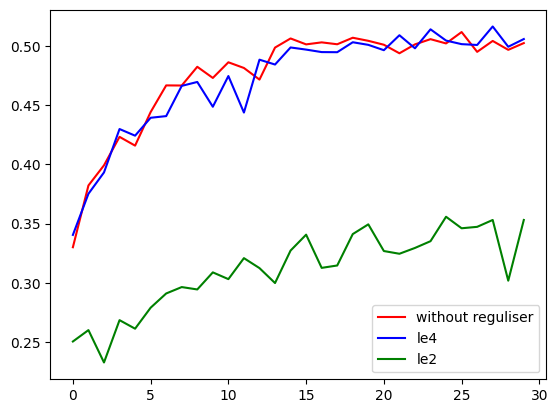

In [18]:
#visualisation
plt.plot(m1.history['val_accuracy'],label='without reguliser',color='red')
plt.plot(m2.history['val_accuracy'],label='le4',color='blue')
plt.plot(m3.history['val_accuracy'],label='le2',color='green')
plt.title='validation accuracy'
plt.xlabel='epochs'
plt.ylabel='accuracy'
plt.legend()
plt.show()